## What is the most Optimal skill to learn for Data Scientist?

### Methodology

##### 1. Group Skills to determine median salary and likhehood of being in posting 
##### 2.Visualize Median salary vs Percent salary
##### 3.(Optional) Determine if certain technologies are more prevelent

In [1]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
# loading Data
dataset= load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']= df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Filter For Data Scientist Data
#df_DS= df[df["job_title_short"]=="Data Scientist"].copy()

In [2]:
df_DS_Pak=df[(df["job_title_short"]== "Data Scientist")  &  (df['job_country']== "Pakistan")].copy()

In [4]:
df_DS_Pak=df_DS_Pak.dropna(subset=["salary_year_avg"])

df_DS_pak_explode= df_DS_Pak.explode('job_skills')

df_DS_pak_explode[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
75724,157500.0,python
75724,157500.0,sql
75724,157500.0,r
75724,157500.0,tableau
87668,109500.0,r


In [12]:
df_DS_skills=df_DS_pak_explode.groupby("job_skills")["salary_year_avg"].agg(["count", 'median']).sort_values(by='count' , ascending=False)
df_DS_skills=df_DS_skills.rename(columns={'count':"skill_count" , 'median':"median_salary"})
DS_job_count= len(df_DS_Pak)
df_DS_skills['skill_percent']=df_DS_skills['skill_count']/ DS_job_count*100
skill_percent=5
df_DS_skills_high_demand= df_DS_skills[df_DS_skills['skill_percent']> skill_percent]

df_DS_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
python,3,157500.0,100.000000
r,3,157500.0,100.000000
sql,3,157500.0,100.000000
hadoop,2,133500.0,66.666667
tableau,2,133500.0,66.666667
nosql,1,109500.0,33.333333
power bi,1,109500.0,33.333333
spark,1,109500.0,33.333333


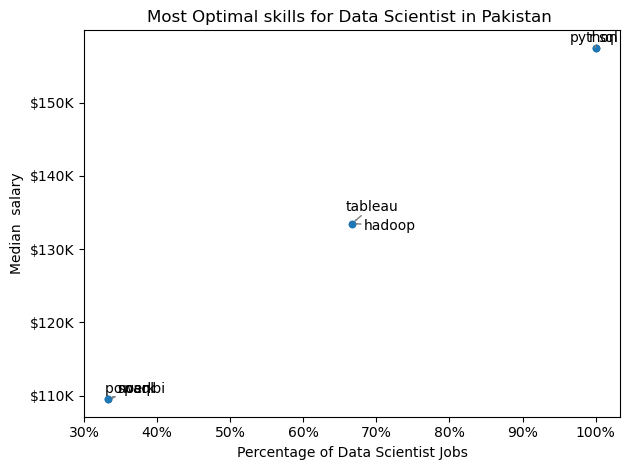

In [20]:
from adjustText import adjust_text

df_DS_skills_high_demand.plot(kind='scatter' , x='skill_percent' , y='median_salary')
texts=[]
for i,txt in enumerate(df_DS_skills_high_demand.index):
   texts.append( plt.text(df_DS_skills_high_demand['skill_percent'].iloc[i], df_DS_skills_high_demand['median_salary'].iloc[i],txt))
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="gray", lw=1))

# ax=plt.gca()
# ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.ylabel("Median  Yearly salary") 
plt.xlabel("Percentage of Data Scientist Jobs")

plt.title(f"Most Optimal skills for Data Scientist in Pakistan ")

from matplotlib.ticker import PercentFormatter
ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()

In [21]:
df['job_type_skills'].head(10)

0                                                 None
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: object

In [29]:
df_technology= df["job_type_skills"].copy()

#remove Duplicates
df_technology=df_technology.drop_duplicates()

#remove NaN Values
df_technology=df_technology.dropna()

#Combine all Dictionaries into one
technology_dict={}
for row in df_technology:
        row_dict= ast.literal_eval(row) # convert string to dictioanary
        for key, value in row_dict.items():
            if key in technology_dict: #if key already exists in technology dict, add value to existing
                technology_dict[key] +=value
            else:
                technology_dict[key]=value

    # remove duplicates by converting values to set then back to list

for key, value in technology_dict.items():
        technology_dict[key]= list(set(value))


        technology_dict
